#### Graph

node: vertex

edges: connection


1. Types

* **undirected graph**

    a. **in terms of weight**

    (1) weighted graph

    (2) unweighted graph

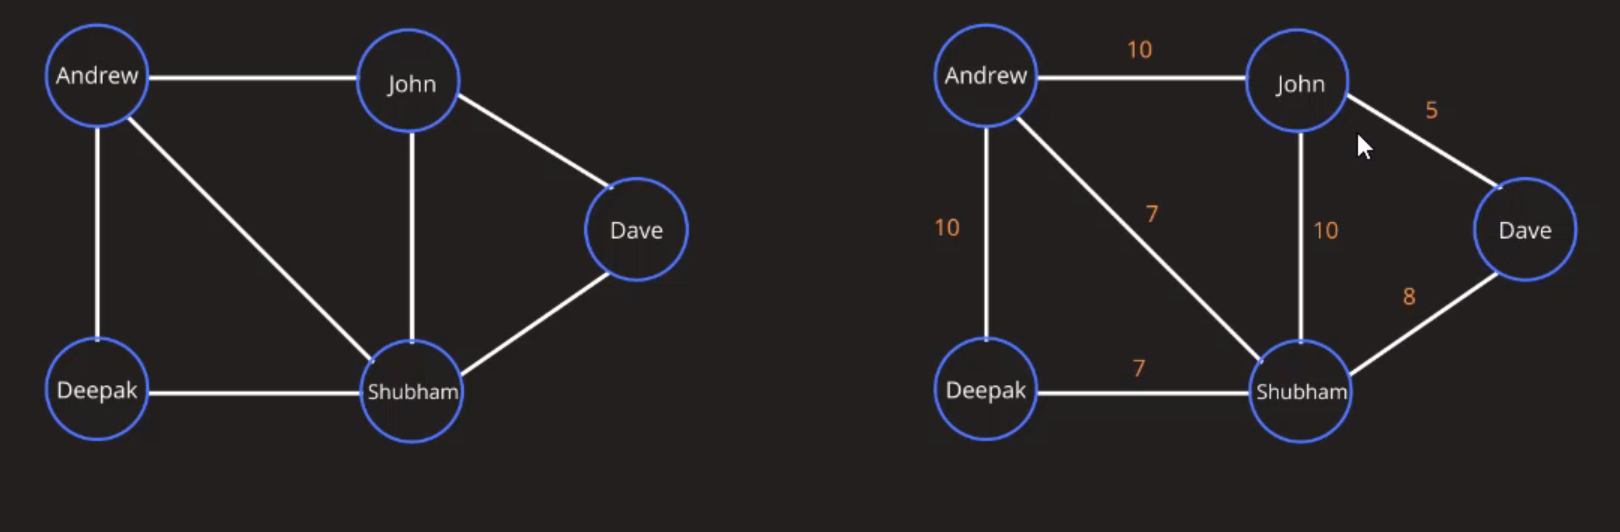





* **directed graph**

    with certain restriction



#### a more detailed classification:

* Undirected graph: A graph in which the edges have no direction, representing a two-way relationship between nodes. For example, if we consider each person on Instagram as a node and their connection with other users as edges, a two-way relationship occurs when person A follows person B and person B also follows person A.

* Directed graph: A graph in which the edges have a direction, indicating a one-way relationship between nodes. For example, if person A follows person B but person B doesn’t follow person A, it’s a one-way relationship.

* Weighted graph: A graph in which each edge has a numerical value assigned to it, indicating the cost, distance, or some other relevant measure associated with that connection. For example, if each person’s connection with the other person has some weight assigned to it, then the weight of 
8
 represents a strong connection between person A and person B and the weight of 
3
 indicates a weaker connection between person A and person C.

* Cyclic graph: A graph that contains at least one cycle, which is a path that starts and ends at the same node. For example, person A is friends with person B, who is friends with person C, and finally, person C is friends with person A, completing the cycle.

* Acyclic graph: A graph that contains no cycles, that is, there is no path that starts and ends at the same node. For example, person A is friends with person B, who is friends with person C, and finally, person C is friends with person D, not creating any cycle.



2. Use cases

    (1) undirected graph: social media

    (2) directed graph: like instagram following procedure. a follows b: a->b. But b hasn't followed a. This is especially useful for "suggest for connection" and "ads pinpoint"



#### Graph traversal

a graph don't have root

graph implementation using python:

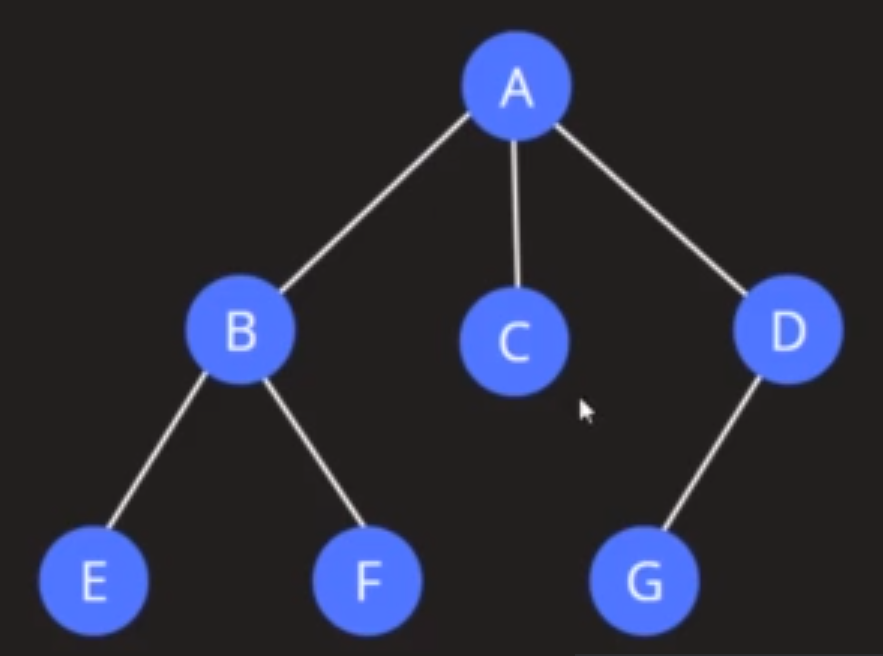


#### Complexity 
**DFS**: 

**BFS**

time compleity, o(v+e) where v: vertex and e: edge. space complexity, o(v)

In [10]:
class Node():

    def __init__(self, value):
        self.value = value
        self.adjacent_list = []

        # whether visisted or not
        self.visited = False


class Graph():
    def BFS(self,node):
        queue = []
        # add first node
        queue.append(node)
        node.visited = True
        traversal = []

        while queue:
            actual_node = queue.pop(0)
            traversal.append(actual_node.value)

            for element in actual_node.adjacent_list:
                if not element.visited:
                    element.visited = True
                    queue.append(element)
        
        return traversal

    def DFS(self,node, traversal):
        # use recursion method
        # start node
        node.visited = True
        traversal.append(node.value)

        for element in node.adjacent_list:
            if not element.visited:
                self.DFS(element, traversal)
        
        return traversal

        




node1 = Node("A")
node2 = Node("B")
node3 = Node("C")
node4 = Node("D")
node5 = Node("E")
node6 = Node("F")
node7 = Node("G")

# a is connected to b, c, d
node1.adjacent_list.append(node2)
node1.adjacent_list.append(node3)
node1.adjacent_list.append(node4)

# B is connected to E, F
node2.adjacent_list.append(node5)
node2.adjacent_list.append(node6)

# D is connected to G
node4.adjacent_list.append(node7)


# connect c to a - cyclic
node3.adjacent_list.append(node1)



In [4]:
# implement bfs
graph = Graph()
print(graph.BFS(node1))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [11]:
# implement dfs
graph = Graph()
print(graph.DFS(node1, []))

['A', 'B', 'E', 'F', 'C', 'D', 'G']


#### Q1

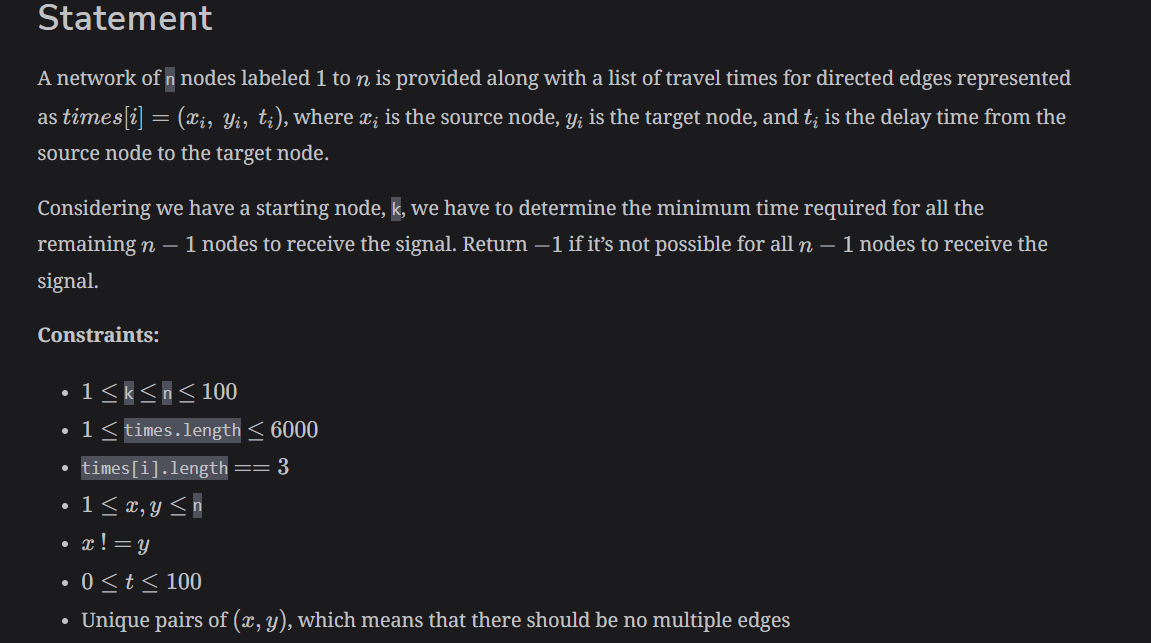

#### Q2

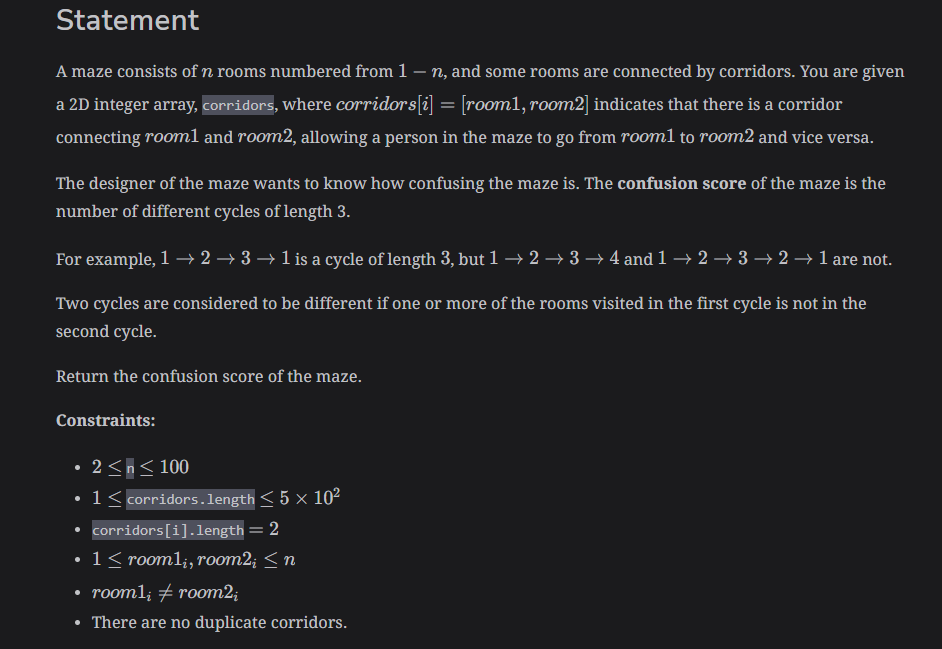

In [2]:
def generate_adjacency_matrix(n, corridors):
    adj_matrix = [[0] * n for _ in range(n)]
    for room1, room2 in corridors:
        adj_matrix[room1 - 1][room2 - 1] = 1
        adj_matrix[room2 - 1][room1 - 1] = 1
    return adj_matrix

def dfs(n, adj_matrix, cycle_len, start_node, current_node, visited, total_cycles):
    if cycle_len == 3:
        if current_node == start_node:
            total_cycles[0] += 1
        return

    visited[current_node - 1] = True

    for next_node in range(n):
        if adj_matrix[current_node - 1][next_node] == 1 and (next_node + 1 != start_node or cycle_len == 2):
            if not visited[next_node]:
                dfs(n, adj_matrix, cycle_len + 1, start_node, next_node + 1, visited, total_cycles)
    
    visited[current_node - 1] = False

def confusion_score_of_maze(n, corridors):
    adj_matrix = generate_adjacency_matrix(n, corridors)
    total_cycles = [0]  # Use a list to mutate integer in recursive calls

    for start_node in range(1, n + 1):
        visited = [False] * n
        dfs(n, adj_matrix, 0, start_node, start_node, visited, total_cycles)
    
    return total_cycles[0] // 6

# Example usage
n = 5
corridors = [[1, 2], [2, 3], [3, 1], [3, 4], [4, 5]]
print(confusion_score_of_maze(n, corridors))  # Should output the number of unique cycles of length 3



0


In [12]:
total_cycles = 0
def generate_adjacency_matrix(n, corridors):
    adj_matrix = [[0 for _ in range(n)] for _ in range(n)]
    for corridor in corridors:
        adj_matrix[corridor[0]-1][corridor[1]-1] = 1
        adj_matrix[corridor[1]-1][corridor[0]-1] = 1
    return adj_matrix

def dfs(n, adj_matrix, cycle_len, start_node, current_node, visited):
    if cycle_len == 3:
        if adj_matrix[current_node - 1][start_node - 1] == 1:  # Ensure there's an edge back to the start node
            global total_cycles
            total_cycles += 1
        return  # Return after checking for a complete cycle or if max cycle length is reached

    visited[current_node - 1] = True  # Mark the current node as visited

    for next_node in range(1, n + 1):
        if adj_matrix[current_node - 1][next_node - 1] == 1 and not visited[next_node - 1]:
            dfs(n, adj_matrix, cycle_len + 1, start_node, next_node, visited)

    visited[current_node - 1] = False  # Unmark the node after recursion

def number_of_paths(n, corridors):
    adj_matrix = generate_adjacency_matrix(n, corridors)
    global total_cycles
    total_cycles = 0

    for start_node in range(1, n + 1):
        visited = [False] * n
        dfs(n, adj_matrix, 0, start_node, start_node, visited)

    return total_cycles // 6

# Example usage
n = 5
corridors = [[1, 2], [2, 3], [3, 1], [3, 4], [4, 5]]
print(number_of_paths(n, corridors))  # Outputs the number of unique cycles of length 3

0
